In [18]:
import data
import models
import time
from tensorflow.keras.callbacks import CSVLogger, TerminateOnNaN

In [19]:
d = data.Data()

In [20]:
d.split_train_test(28)

In [21]:
d.standarize_data()

In [22]:
vocab_size, max_len, enc_names = d.encode_names()

In [23]:
train_x, train_y, test_x, test_y = d.retreive_data()

In [24]:
multi_train_y = d.make_multi_output_data(train_y)
multi_test_y = d.make_multi_output_data(test_y)

In [25]:
print("Data structure")
print(f"Number of countries: {len(d.countries)}")
# Check if all countries have the same data shape.
for c in d.countries:
    if c.data.shape != d.countries[0].data.shape:
        print(f"{c.name} has shape of {c.data.shape} instead of {d.countries[0].data.shape}")

Data structure
Number of countries: 188


In [26]:
print(f"Shape for country data: {d.countries[0].data.shape}")
print(f"train_x: {train_x.shape}\ntrain_y: {train_y.shape}\ntest_x: {test_x.shape}\ntest_y: {test_y.shape}")
print(f"Shape for multi train y: {multi_train_y.shape} and multi test y: {multi_test_y.shape}")
print(f"Vocab size: {vocab_size} and Max length: {max_len}")
print(f"Enc names: {enc_names.shape} and type: {type(enc_names)}")

Shape for country data: (243, 5)
train_x: (188, 187, 3)
train_y: (188, 28, 3)
test_x: (188, 187, 3)
test_y: (188, 28, 3)
Shape for multi train y: (3, 188, 28) and multi test y: (3, 188, 28)
Vocab size: 235.0 and Max length: 5
Enc names: (188, 5) and type: <class 'numpy.ndarray'>


In [27]:
temporal_shape = train_x[0].shape
word_shape = enc_names[0].shape
units = 100
output_size = 28

Create models.

In [28]:
multi_out_lstm = models.LSTMMultiOutput(temporal_shape, word_shape, units, output_size)
multi_out_gru = models.GRUMultiOutput(temporal_shape, word_shape, units, output_size)

In [29]:
multi_out_lstm_V2 = models.LSTMMultiOutput_V2(temporal_shape, word_shape, units, output_size)
multi_out_gru_V2 = models.GRUMultiOutput_V2(temporal_shape, word_shape, units, output_size)

In [30]:
single_out_lstm = models.LSTMSingleOutput(temporal_shape, word_shape, units, output_size)
single_out_gru = models.GRUSingleOutput(temporal_shape, word_shape, units, output_size)

Print model architecture.

In [31]:
print(multi_out_lstm.summary())
print(multi_out_gru.summary())
print(multi_out_lstm_V2.summary())
print(multi_out_gru_V2.summary())
print(single_out_lstm.summary())
print(single_out_gru.summary())

Model: "LSTMMultiOutput"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
time_series_input (InputLayer)  [(None, 187, 3)]     0                                            
__________________________________________________________________________________________________
country_name_input (InputLayer) [(None, 5)]          0                                            
__________________________________________________________________________________________________
LSTM_encoder (LSTM)             (None, 100)          41600       time_series_input[0][0]          
__________________________________________________________________________________________________
country_name (Dense)            (None, 1)            6           country_name_input[0][0]         
____________________________________________________________________________________

Create logger callbacks.

In [32]:
multi_out_lstm_logger = CSVLogger('multi_out_lstm.csv', separator=',')
multi_out_gru_logger = CSVLogger('multi_out_gru.csv', separator=',')
multi_out_lstm_V2_logger = CSVLogger('multi_out_lstm_V2.csv', separator=',')
multi_out_gru_V2_logger = CSVLogger('multi_out_gru_V2.csv', separator=',')
single_out_lstm_logger = CSVLogger('single_out_lstm.csv', separator=',')
single_out_gru_logger = CSVLogger('single_out_gru.csv', separator=',')

In [33]:
ton_back = TerminateOnNaN()

In [34]:
epochs = 300
verbose=1

Train models.

In [35]:
multi_out_lstm_hist = multi_out_lstm.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                         epochs=epochs, verbose=verbose, callbacks=[multi_out_lstm_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 1s 188ms/step - loss: 716.0450 - confirmed_loss: 186.6416 - deceased_loss: 260.7104 - recovered_loss: 268.6931 - confirmed_mean_squared_error: 186.6416 - confirmed_root_mean_squared_error: 13.6617 - deceased_mean_squared_error: 260.7104 - deceased_root_mean_squared_error: 16.1465 - recovered_mean_squared_error: 268.6931 - recovered_root_mean_squared_error: 16.3919
Epoch 2/300
6/6 [==============================] - 2s 270ms/step - loss: 624.9138 - confirmed_loss: 163.5089 - deceased_loss: 225.0716 - recovered_loss: 236.3333 - confirmed_mean_squared_error: 163.5089 - confirmed_root_mean_squared_error: 12.7871 - deceased_mean_squared_error: 225.0716 - deceased_root_mean_squared_error: 15.0024 - recovered_mean_squared_error: 236.3333 - recovered_root_mean_squared_error: 15.3731
Epoch 3/300
6/6 [==============================] - 2s 266ms/step - loss: 539.9545 - confirmed_loss: 138.2663 - deceased_loss: 195.2241 - recovered_loss: 206.4639 - 

6/6 [==============================] - 1s 171ms/step - loss: 64.7831 - confirmed_loss: 16.0461 - deceased_loss: 24.5889 - recovered_loss: 24.1482 - confirmed_mean_squared_error: 16.0461 - confirmed_root_mean_squared_error: 4.0058 - deceased_mean_squared_error: 24.5889 - deceased_root_mean_squared_error: 4.9587 - recovered_mean_squared_error: 24.1482 - recovered_root_mean_squared_error: 4.9141
Epoch 21/300
6/6 [==============================] - 2s 261ms/step - loss: 57.9130 - confirmed_loss: 14.1364 - deceased_loss: 22.2455 - recovered_loss: 21.5311 - confirmed_mean_squared_error: 14.1364 - confirmed_root_mean_squared_error: 3.7598 - deceased_mean_squared_error: 22.2455 - deceased_root_mean_squared_error: 4.7165 - recovered_mean_squared_error: 21.5311 - recovered_root_mean_squared_error: 4.6402
Epoch 22/300
6/6 [==============================] - 1s 213ms/step - loss: 50.6522 - confirmed_loss: 12.5404 - deceased_loss: 19.5497 - recovered_loss: 18.5621 - confirmed_mean_squared_error: 12.5

6/6 [==============================] - 1s 180ms/step - loss: nan - confirmed_loss: nan - deceased_loss: nan - recovered_loss: nan - confirmed_mean_squared_error: nan - confirmed_root_mean_squared_error: nan - deceased_mean_squared_error: nan - deceased_root_mean_squared_error: nan - recovered_mean_squared_error: nan - recovered_root_mean_squared_error: nan


In [36]:
multi_out_gru_hist = multi_out_gru.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                       epochs=epochs, verbose=verbose, callbacks=[multi_out_gru_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 1s 227ms/step - loss: 521.4345 - confirmed_loss: 199.1344 - deceased_loss: 154.6516 - recovered_loss: 167.6486 - confirmed_mean_squared_error: 199.1344 - confirmed_root_mean_squared_error: 14.1115 - deceased_mean_squared_error: 154.6516 - deceased_root_mean_squared_error: 12.4359 - recovered_mean_squared_error: 167.6486 - recovered_root_mean_squared_error: 12.9479
Epoch 2/300
6/6 [==============================] - 1s 200ms/step - loss: 461.8810 - confirmed_loss: 177.3580 - deceased_loss: 135.5285 - recovered_loss: 148.9944 - confirmed_mean_squared_error: 177.3580 - confirmed_root_mean_squared_error: 13.3176 - deceased_mean_squared_error: 135.5285 - deceased_root_mean_squared_error: 11.6417 - recovered_mean_squared_error: 148.9944 - recovered_root_mean_squared_error: 12.2063
Epoch 3/300
6/6 [==============================] - 2s 271ms/step - loss: 405.7149 - confirmed_loss: 156.5540 - deceased_loss: 117.6540 - recovered_loss: 131.5070 - 

6/6 [==============================] - 1s 243ms/step - loss: 38.3633 - confirmed_loss: 14.9383 - deceased_loss: 11.0862 - recovered_loss: 12.3388 - confirmed_mean_squared_error: 14.9383 - confirmed_root_mean_squared_error: 3.8650 - deceased_mean_squared_error: 11.0862 - deceased_root_mean_squared_error: 3.3296 - recovered_mean_squared_error: 12.3388 - recovered_root_mean_squared_error: 3.5127
Epoch 21/300
6/6 [==============================] - 1s 237ms/step - loss: 36.6461 - confirmed_loss: 14.2942 - deceased_loss: 10.5562 - recovered_loss: 11.7957 - confirmed_mean_squared_error: 14.2942 - confirmed_root_mean_squared_error: 3.7808 - deceased_mean_squared_error: 10.5562 - deceased_root_mean_squared_error: 3.2490 - recovered_mean_squared_error: 11.7957 - recovered_root_mean_squared_error: 3.4345
Epoch 22/300
6/6 [==============================] - 1s 214ms/step - loss: 35.3652 - confirmed_loss: 13.8115 - deceased_loss: 10.1562 - recovered_loss: 11.3974 - confirmed_mean_squared_error: 13.8

6/6 [==============================] - 1s 202ms/step - loss: 17.2764 - confirmed_loss: 6.8352 - deceased_loss: 4.7430 - recovered_loss: 5.6983 - confirmed_mean_squared_error: 6.8352 - confirmed_root_mean_squared_error: 2.6144 - deceased_mean_squared_error: 4.7430 - deceased_root_mean_squared_error: 2.1778 - recovered_mean_squared_error: 5.6983 - recovered_root_mean_squared_error: 2.3871
Epoch 41/300
6/6 [==============================] - 1s 225ms/step - loss: 16.5063 - confirmed_loss: 6.5303 - deceased_loss: 4.5219 - recovered_loss: 5.4541 - confirmed_mean_squared_error: 6.5303 - confirmed_root_mean_squared_error: 2.5554 - deceased_mean_squared_error: 4.5219 - deceased_root_mean_squared_error: 2.1265 - recovered_mean_squared_error: 5.4541 - recovered_root_mean_squared_error: 2.3354
Epoch 42/300
6/6 [==============================] - 1s 215ms/step - loss: 16.1435 - confirmed_loss: 6.3904 - deceased_loss: 4.4088 - recovered_loss: 5.3443 - confirmed_mean_squared_error: 6.3904 - confirmed_

6/6 [==============================] - 1s 140ms/step - loss: 7.6184 - confirmed_loss: 2.9753 - deceased_loss: 2.0517 - recovered_loss: 2.5914 - confirmed_mean_squared_error: 2.9753 - confirmed_root_mean_squared_error: 1.7249 - deceased_mean_squared_error: 2.0517 - deceased_root_mean_squared_error: 1.4324 - recovered_mean_squared_error: 2.5914 - recovered_root_mean_squared_error: 1.6098
Epoch 61/300
6/6 [==============================] - 1s 117ms/step - loss: 7.2963 - confirmed_loss: 2.8482 - deceased_loss: 1.9627 - recovered_loss: 2.4854 - confirmed_mean_squared_error: 2.8482 - confirmed_root_mean_squared_error: 1.6877 - deceased_mean_squared_error: 1.9627 - deceased_root_mean_squared_error: 1.4010 - recovered_mean_squared_error: 2.4854 - recovered_root_mean_squared_error: 1.5765
Epoch 62/300
6/6 [==============================] - 1s 135ms/step - loss: 7.1289 - confirmed_loss: 2.7833 - deceased_loss: 1.9117 - recovered_loss: 2.4340 - confirmed_mean_squared_error: 2.7833 - confirmed_roo

6/6 [==============================] - 1s 213ms/step - loss: 3.5114 - confirmed_loss: 1.3206 - deceased_loss: 0.9518 - recovered_loss: 1.2390 - confirmed_mean_squared_error: 1.3206 - confirmed_root_mean_squared_error: 1.1492 - deceased_mean_squared_error: 0.9518 - deceased_root_mean_squared_error: 0.9756 - recovered_mean_squared_error: 1.2390 - recovered_root_mean_squared_error: 1.1131
Epoch 81/300
6/6 [==============================] - 2s 283ms/step - loss: 3.3286 - confirmed_loss: 1.2480 - deceased_loss: 0.9052 - recovered_loss: 1.1753 - confirmed_mean_squared_error: 1.2480 - confirmed_root_mean_squared_error: 1.1172 - deceased_mean_squared_error: 0.9052 - deceased_root_mean_squared_error: 0.9514 - recovered_mean_squared_error: 1.1753 - recovered_root_mean_squared_error: 1.0841
Epoch 82/300
6/6 [==============================] - 2s 264ms/step - loss: 3.2783 - confirmed_loss: 1.2273 - deceased_loss: 0.8937 - recovered_loss: 1.1573 - confirmed_mean_squared_error: 1.2273 - confirmed_roo

6/6 [==============================] - 1s 174ms/step - loss: 1.7235 - confirmed_loss: 0.5968 - deceased_loss: 0.5040 - recovered_loss: 0.6226 - confirmed_mean_squared_error: 0.5968 - confirmed_root_mean_squared_error: 0.7726 - deceased_mean_squared_error: 0.5040 - deceased_root_mean_squared_error: 0.7099 - recovered_mean_squared_error: 0.6226 - recovered_root_mean_squared_error: 0.7891
Epoch 101/300
6/6 [==============================] - 1s 133ms/step - loss: 1.6684 - confirmed_loss: 0.5744 - deceased_loss: 0.4917 - recovered_loss: 0.6023 - confirmed_mean_squared_error: 0.5744 - confirmed_root_mean_squared_error: 0.7579 - deceased_mean_squared_error: 0.4917 - deceased_root_mean_squared_error: 0.7012 - recovered_mean_squared_error: 0.6023 - recovered_root_mean_squared_error: 0.7761
Epoch 102/300
6/6 [==============================] - 1s 126ms/step - loss: 1.5972 - confirmed_loss: 0.5463 - deceased_loss: 0.4748 - recovered_loss: 0.5761 - confirmed_mean_squared_error: 0.5463 - confirmed_r

6/6 [==============================] - 2s 262ms/step - loss: 0.9581 - confirmed_loss: 0.2901 - deceased_loss: 0.3232 - recovered_loss: 0.3448 - confirmed_mean_squared_error: 0.2901 - confirmed_root_mean_squared_error: 0.5386 - deceased_mean_squared_error: 0.3232 - deceased_root_mean_squared_error: 0.5685 - recovered_mean_squared_error: 0.3448 - recovered_root_mean_squared_error: 0.5872
Epoch 121/300
6/6 [==============================] - 1s 212ms/step - loss: 0.9373 - confirmed_loss: 0.2814 - deceased_loss: 0.3191 - recovered_loss: 0.3369 - confirmed_mean_squared_error: 0.2814 - confirmed_root_mean_squared_error: 0.5304 - deceased_mean_squared_error: 0.3191 - deceased_root_mean_squared_error: 0.5649 - recovered_mean_squared_error: 0.3369 - recovered_root_mean_squared_error: 0.5804
Epoch 122/300
6/6 [==============================] - 1s 172ms/step - loss: 0.9221 - confirmed_loss: 0.2750 - deceased_loss: 0.3160 - recovered_loss: 0.3311 - confirmed_mean_squared_error: 0.2750 - confirmed_r

6/6 [==============================] - 2s 268ms/step - loss: 0.6497 - confirmed_loss: 0.1694 - deceased_loss: 0.2524 - recovered_loss: 0.2278 - confirmed_mean_squared_error: 0.1694 - confirmed_root_mean_squared_error: 0.4116 - deceased_mean_squared_error: 0.2524 - deceased_root_mean_squared_error: 0.5024 - recovered_mean_squared_error: 0.2278 - recovered_root_mean_squared_error: 0.4773
Epoch 141/300
6/6 [==============================] - 1s 223ms/step - loss: 0.6374 - confirmed_loss: 0.1655 - deceased_loss: 0.2483 - recovered_loss: 0.2236 - confirmed_mean_squared_error: 0.1655 - confirmed_root_mean_squared_error: 0.4069 - deceased_mean_squared_error: 0.2483 - deceased_root_mean_squared_error: 0.4983 - recovered_mean_squared_error: 0.2236 - recovered_root_mean_squared_error: 0.4728
Epoch 142/300
6/6 [==============================] - 1s 241ms/step - loss: 0.6277 - confirmed_loss: 0.1624 - deceased_loss: 0.2460 - recovered_loss: 0.2193 - confirmed_mean_squared_error: 0.1624 - confirmed_r

6/6 [==============================] - 2s 259ms/step - loss: 0.5015 - confirmed_loss: 0.1147 - deceased_loss: 0.2163 - recovered_loss: 0.1704 - confirmed_mean_squared_error: 0.1147 - confirmed_root_mean_squared_error: 0.3387 - deceased_mean_squared_error: 0.2163 - deceased_root_mean_squared_error: 0.4651 - recovered_mean_squared_error: 0.1704 - recovered_root_mean_squared_error: 0.4128
Epoch 161/300
6/6 [==============================] - 1s 222ms/step - loss: 0.4965 - confirmed_loss: 0.1130 - deceased_loss: 0.2146 - recovered_loss: 0.1689 - confirmed_mean_squared_error: 0.1130 - confirmed_root_mean_squared_error: 0.3361 - deceased_mean_squared_error: 0.2146 - deceased_root_mean_squared_error: 0.4633 - recovered_mean_squared_error: 0.1689 - recovered_root_mean_squared_error: 0.4110
Epoch 162/300
6/6 [==============================] - 2s 270ms/step - loss: 0.4928 - confirmed_loss: 0.1119 - deceased_loss: 0.2133 - recovered_loss: 0.1675 - confirmed_mean_squared_error: 0.1119 - confirmed_r

6/6 [==============================] - 1s 205ms/step - loss: 0.4314 - confirmed_loss: 0.0910 - deceased_loss: 0.1962 - recovered_loss: 0.1441 - confirmed_mean_squared_error: 0.0910 - confirmed_root_mean_squared_error: 0.3017 - deceased_mean_squared_error: 0.1962 - deceased_root_mean_squared_error: 0.4429 - recovered_mean_squared_error: 0.1441 - recovered_root_mean_squared_error: 0.3797
Epoch 181/300
6/6 [==============================] - 1s 232ms/step - loss: 0.4302 - confirmed_loss: 0.0907 - deceased_loss: 0.1957 - recovered_loss: 0.1438 - confirmed_mean_squared_error: 0.0907 - confirmed_root_mean_squared_error: 0.3012 - deceased_mean_squared_error: 0.1957 - deceased_root_mean_squared_error: 0.4424 - recovered_mean_squared_error: 0.1438 - recovered_root_mean_squared_error: 0.3792
Epoch 182/300
6/6 [==============================] - 2s 264ms/step - loss: 0.4272 - confirmed_loss: 0.0897 - deceased_loss: 0.1947 - recovered_loss: 0.1428 - confirmed_mean_squared_error: 0.0897 - confirmed_r

6/6 [==============================] - 1s 243ms/step - loss: 0.3963 - confirmed_loss: 0.0805 - deceased_loss: 0.1838 - recovered_loss: 0.1320 - confirmed_mean_squared_error: 0.0805 - confirmed_root_mean_squared_error: 0.2837 - deceased_mean_squared_error: 0.1838 - deceased_root_mean_squared_error: 0.4287 - recovered_mean_squared_error: 0.1320 - recovered_root_mean_squared_error: 0.3633
Epoch 201/300
6/6 [==============================] - 2s 262ms/step - loss: 0.3942 - confirmed_loss: 0.0799 - deceased_loss: 0.1835 - recovered_loss: 0.1308 - confirmed_mean_squared_error: 0.0799 - confirmed_root_mean_squared_error: 0.2826 - deceased_mean_squared_error: 0.1835 - deceased_root_mean_squared_error: 0.4284 - recovered_mean_squared_error: 0.1308 - recovered_root_mean_squared_error: 0.3617
Epoch 202/300
6/6 [==============================] - 2s 259ms/step - loss: 0.3925 - confirmed_loss: 0.0794 - deceased_loss: 0.1825 - recovered_loss: 0.1307 - confirmed_mean_squared_error: 0.0794 - confirmed_r

6/6 [==============================] - 1s 248ms/step - loss: 0.3755 - confirmed_loss: 0.0746 - deceased_loss: 0.1764 - recovered_loss: 0.1244 - confirmed_mean_squared_error: 0.0746 - confirmed_root_mean_squared_error: 0.2732 - deceased_mean_squared_error: 0.1764 - deceased_root_mean_squared_error: 0.4200 - recovered_mean_squared_error: 0.1244 - recovered_root_mean_squared_error: 0.3528
Epoch 221/300
6/6 [==============================] - 2s 264ms/step - loss: 0.3727 - confirmed_loss: 0.0744 - deceased_loss: 0.1752 - recovered_loss: 0.1231 - confirmed_mean_squared_error: 0.0744 - confirmed_root_mean_squared_error: 0.2728 - deceased_mean_squared_error: 0.1752 - deceased_root_mean_squared_error: 0.4186 - recovered_mean_squared_error: 0.1231 - recovered_root_mean_squared_error: 0.3508
Epoch 222/300
6/6 [==============================] - 1s 196ms/step - loss: 0.3722 - confirmed_loss: 0.0742 - deceased_loss: 0.1745 - recovered_loss: 0.1235 - confirmed_mean_squared_error: 0.0742 - confirmed_r

6/6 [==============================] - 2s 261ms/step - loss: 0.3647 - confirmed_loss: 0.0715 - deceased_loss: 0.1721 - recovered_loss: 0.1211 - confirmed_mean_squared_error: 0.0715 - confirmed_root_mean_squared_error: 0.2674 - deceased_mean_squared_error: 0.1721 - deceased_root_mean_squared_error: 0.4148 - recovered_mean_squared_error: 0.1211 - recovered_root_mean_squared_error: 0.3480
Epoch 241/300
6/6 [==============================] - 2s 256ms/step - loss: 0.3627 - confirmed_loss: 0.0715 - deceased_loss: 0.1707 - recovered_loss: 0.1204 - confirmed_mean_squared_error: 0.0715 - confirmed_root_mean_squared_error: 0.2674 - deceased_mean_squared_error: 0.1707 - deceased_root_mean_squared_error: 0.4132 - recovered_mean_squared_error: 0.1204 - recovered_root_mean_squared_error: 0.3470
Epoch 242/300
6/6 [==============================] - 2s 257ms/step - loss: 0.3590 - confirmed_loss: 0.0710 - deceased_loss: 0.1688 - recovered_loss: 0.1193 - confirmed_mean_squared_error: 0.0710 - confirmed_r

6/6 [==============================] - 2s 257ms/step - loss: 0.3534 - confirmed_loss: 0.0694 - deceased_loss: 0.1664 - recovered_loss: 0.1175 - confirmed_mean_squared_error: 0.0694 - confirmed_root_mean_squared_error: 0.2635 - deceased_mean_squared_error: 0.1664 - deceased_root_mean_squared_error: 0.4080 - recovered_mean_squared_error: 0.1175 - recovered_root_mean_squared_error: 0.3428
Epoch 261/300
6/6 [==============================] - 2s 257ms/step - loss: 0.3531 - confirmed_loss: 0.0695 - deceased_loss: 0.1657 - recovered_loss: 0.1179 - confirmed_mean_squared_error: 0.0695 - confirmed_root_mean_squared_error: 0.2636 - deceased_mean_squared_error: 0.1657 - deceased_root_mean_squared_error: 0.4071 - recovered_mean_squared_error: 0.1179 - recovered_root_mean_squared_error: 0.3434
Epoch 262/300
6/6 [==============================] - 1s 231ms/step - loss: 0.3509 - confirmed_loss: 0.0692 - deceased_loss: 0.1648 - recovered_loss: 0.1169 - confirmed_mean_squared_error: 0.0692 - confirmed_r

6/6 [==============================] - 1s 164ms/step - loss: 0.3560 - confirmed_loss: 0.0721 - deceased_loss: 0.1630 - recovered_loss: 0.1210 - confirmed_mean_squared_error: 0.0721 - confirmed_root_mean_squared_error: 0.2684 - deceased_mean_squared_error: 0.1630 - deceased_root_mean_squared_error: 0.4037 - recovered_mean_squared_error: 0.1210 - recovered_root_mean_squared_error: 0.3479
Epoch 281/300
6/6 [==============================] - 1s 163ms/step - loss: 0.3540 - confirmed_loss: 0.0700 - deceased_loss: 0.1652 - recovered_loss: 0.1188 - confirmed_mean_squared_error: 0.0700 - confirmed_root_mean_squared_error: 0.2646 - deceased_mean_squared_error: 0.1652 - deceased_root_mean_squared_error: 0.4064 - recovered_mean_squared_error: 0.1188 - recovered_root_mean_squared_error: 0.3446
Epoch 282/300
6/6 [==============================] - 1s 164ms/step - loss: 0.3513 - confirmed_loss: 0.0699 - deceased_loss: 0.1632 - recovered_loss: 0.1182 - confirmed_mean_squared_error: 0.0699 - confirmed_r

6/6 [==============================] - 1s 162ms/step - loss: 0.3422 - confirmed_loss: 0.0674 - deceased_loss: 0.1597 - recovered_loss: 0.1151 - confirmed_mean_squared_error: 0.0674 - confirmed_root_mean_squared_error: 0.2596 - deceased_mean_squared_error: 0.1597 - deceased_root_mean_squared_error: 0.3996 - recovered_mean_squared_error: 0.1151 - recovered_root_mean_squared_error: 0.3393


In [37]:
multi_out_lstm_V2_hist = multi_out_lstm_V2.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                               epochs=epochs, verbose=verbose, callbacks=[multi_out_lstm_V2_logger,
                                                                                          ton_back])

Epoch 1/300
6/6 [==============================] - 1s 158ms/step - loss: 254.1919 - confirmed_loss: 154.3201 - deceased_loss: 98.7935 - recovered_loss: 1.0782 - confirmed_mean_squared_error: 154.3201 - confirmed_root_mean_squared_error: 12.4226 - deceased_mean_squared_error: 98.7935 - deceased_root_mean_squared_error: 9.9395 - recovered_mean_squared_error: 1.0782 - recovered_root_mean_squared_error: 1.0384
Epoch 2/300
6/6 [==============================] - 1s 166ms/step - loss: 214.8217 - confirmed_loss: 131.5828 - deceased_loss: 82.2274 - recovered_loss: 1.0115 - confirmed_mean_squared_error: 131.5828 - confirmed_root_mean_squared_error: 11.4710 - deceased_mean_squared_error: 82.2274 - deceased_root_mean_squared_error: 9.0679 - recovered_mean_squared_error: 1.0115 - recovered_root_mean_squared_error: 1.0057
Epoch 3/300
6/6 [==============================] - 1s 147ms/step - loss: 165.3418 - confirmed_loss: 99.6561 - deceased_loss: 63.8554 - recovered_loss: 1.8302 - confirmed_mean_squar

In [38]:
multi_out_gru_V2_hist = multi_out_gru_V2.fit([train_x, enc_names], [multi_train_y[0], multi_train_y[1], multi_train_y[2]],
                                             epochs=epochs, verbose=verbose, callbacks=[multi_out_gru_V2_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 1s 162ms/step - loss: 659.5960 - confirmed_loss: 28.5125 - deceased_loss: 144.3685 - recovered_loss: 486.7151 - confirmed_mean_squared_error: 28.5125 - confirmed_root_mean_squared_error: 5.3397 - deceased_mean_squared_error: 144.3685 - deceased_root_mean_squared_error: 12.0153 - recovered_mean_squared_error: 486.7151 - recovered_root_mean_squared_error: 22.0616
Epoch 2/300
6/6 [==============================] - 1s 164ms/step - loss: 567.8781 - confirmed_loss: 20.3212 - deceased_loss: 123.1712 - recovered_loss: 424.3857 - confirmed_mean_squared_error: 20.3212 - confirmed_root_mean_squared_error: 4.5079 - deceased_mean_squared_error: 123.1712 - deceased_root_mean_squared_error: 11.0983 - recovered_mean_squared_error: 424.3857 - recovered_root_mean_squared_error: 20.6006
Epoch 3/300
6/6 [==============================] - 1s 170ms/step - loss: 474.2525 - confirmed_loss: 13.6731 - deceased_loss: 102.3781 - recovered_loss: 358.2014 - confirm

6/6 [==============================] - 1s 168ms/step - loss: 60.8724 - confirmed_loss: 1.2130 - deceased_loss: 8.3431 - recovered_loss: 51.3163 - confirmed_mean_squared_error: 1.2130 - confirmed_root_mean_squared_error: 1.1014 - deceased_mean_squared_error: 8.3431 - deceased_root_mean_squared_error: 2.8884 - recovered_mean_squared_error: 51.3163 - recovered_root_mean_squared_error: 7.1635
Epoch 21/300
6/6 [==============================] - 1s 171ms/step - loss: 57.8220 - confirmed_loss: 1.1738 - deceased_loss: 7.8445 - recovered_loss: 48.8038 - confirmed_mean_squared_error: 1.1738 - confirmed_root_mean_squared_error: 1.0834 - deceased_mean_squared_error: 7.8445 - deceased_root_mean_squared_error: 2.8008 - recovered_mean_squared_error: 48.8038 - recovered_root_mean_squared_error: 6.9860
Epoch 22/300
6/6 [==============================] - 1s 169ms/step - loss: 56.3595 - confirmed_loss: 1.1566 - deceased_loss: 7.5121 - recovered_loss: 47.6908 - confirmed_mean_squared_error: 1.1566 - confi

6/6 [==============================] - 1s 156ms/step - loss: 29.9963 - confirmed_loss: 1.0354 - deceased_loss: 3.1188 - recovered_loss: 25.8421 - confirmed_mean_squared_error: 1.0354 - confirmed_root_mean_squared_error: 1.0176 - deceased_mean_squared_error: 3.1188 - deceased_root_mean_squared_error: 1.7660 - recovered_mean_squared_error: 25.8421 - recovered_root_mean_squared_error: 5.0835
Epoch 41/300
6/6 [==============================] - 1s 163ms/step - loss: 28.7567 - confirmed_loss: 1.0278 - deceased_loss: 2.9554 - recovered_loss: 24.7735 - confirmed_mean_squared_error: 1.0278 - confirmed_root_mean_squared_error: 1.0138 - deceased_mean_squared_error: 2.9554 - deceased_root_mean_squared_error: 1.7191 - recovered_mean_squared_error: 24.7735 - recovered_root_mean_squared_error: 4.9773
Epoch 42/300
6/6 [==============================] - 1s 170ms/step - loss: 27.8770 - confirmed_loss: 1.0772 - deceased_loss: 2.8284 - recovered_loss: 23.9714 - confirmed_mean_squared_error: 1.0772 - confi

6/6 [==============================] - 1s 165ms/step - loss: 14.9410 - confirmed_loss: 0.9970 - deceased_loss: 1.4461 - recovered_loss: 12.4979 - confirmed_mean_squared_error: 0.9970 - confirmed_root_mean_squared_error: 0.9985 - deceased_mean_squared_error: 1.4461 - deceased_root_mean_squared_error: 1.2026 - recovered_mean_squared_error: 12.4979 - recovered_root_mean_squared_error: 3.5352
Epoch 61/300
6/6 [==============================] - 1s 160ms/step - loss: 14.5711 - confirmed_loss: 0.9918 - deceased_loss: 1.4107 - recovered_loss: 12.1686 - confirmed_mean_squared_error: 0.9918 - confirmed_root_mean_squared_error: 0.9959 - deceased_mean_squared_error: 1.4107 - deceased_root_mean_squared_error: 1.1877 - recovered_mean_squared_error: 12.1686 - recovered_root_mean_squared_error: 3.4884
Epoch 62/300
6/6 [==============================] - 1s 152ms/step - loss: 14.1536 - confirmed_loss: 0.9949 - deceased_loss: 1.3790 - recovered_loss: 11.7797 - confirmed_mean_squared_error: 0.9949 - confi

6/6 [==============================] - 1s 229ms/step - loss: 8.3980 - confirmed_loss: 0.9749 - deceased_loss: 1.0045 - recovered_loss: 6.4186 - confirmed_mean_squared_error: 0.9749 - confirmed_root_mean_squared_error: 0.9874 - deceased_mean_squared_error: 1.0045 - deceased_root_mean_squared_error: 1.0023 - recovered_mean_squared_error: 6.4186 - recovered_root_mean_squared_error: 2.5335
Epoch 81/300
6/6 [==============================] - 1s 179ms/step - loss: 8.0470 - confirmed_loss: 0.9748 - deceased_loss: 0.9896 - recovered_loss: 6.0825 - confirmed_mean_squared_error: 0.9748 - confirmed_root_mean_squared_error: 0.9873 - deceased_mean_squared_error: 0.9896 - deceased_root_mean_squared_error: 0.9948 - recovered_mean_squared_error: 6.0825 - recovered_root_mean_squared_error: 2.4663
Epoch 82/300
6/6 [==============================] - 1s 186ms/step - loss: 7.8541 - confirmed_loss: 0.9747 - deceased_loss: 0.9793 - recovered_loss: 5.9000 - confirmed_mean_squared_error: 0.9747 - confirmed_roo

6/6 [==============================] - 2s 265ms/step - loss: 5.1799 - confirmed_loss: 0.9717 - deceased_loss: 0.8661 - recovered_loss: 3.3421 - confirmed_mean_squared_error: 0.9717 - confirmed_root_mean_squared_error: 0.9858 - deceased_mean_squared_error: 0.8661 - deceased_root_mean_squared_error: 0.9307 - recovered_mean_squared_error: 3.3421 - recovered_root_mean_squared_error: 1.8281
Epoch 101/300
6/6 [==============================] - 2s 266ms/step - loss: 5.1150 - confirmed_loss: 0.9722 - deceased_loss: 0.8621 - recovered_loss: 3.2807 - confirmed_mean_squared_error: 0.9722 - confirmed_root_mean_squared_error: 0.9860 - deceased_mean_squared_error: 0.8621 - deceased_root_mean_squared_error: 0.9285 - recovered_mean_squared_error: 3.2807 - recovered_root_mean_squared_error: 1.8113
Epoch 102/300
6/6 [==============================] - 2s 265ms/step - loss: 5.1273 - confirmed_loss: 0.9718 - deceased_loss: 0.8629 - recovered_loss: 3.2926 - confirmed_mean_squared_error: 0.9718 - confirmed_r

6/6 [==============================] - 2s 263ms/step - loss: 3.7792 - confirmed_loss: 0.9709 - deceased_loss: 0.8305 - recovered_loss: 1.9778 - confirmed_mean_squared_error: 0.9709 - confirmed_root_mean_squared_error: 0.9854 - deceased_mean_squared_error: 0.8305 - deceased_root_mean_squared_error: 0.9113 - recovered_mean_squared_error: 1.9778 - recovered_root_mean_squared_error: 1.4063
Epoch 121/300
6/6 [==============================] - 2s 265ms/step - loss: 3.7412 - confirmed_loss: 0.9713 - deceased_loss: 0.8298 - recovered_loss: 1.9401 - confirmed_mean_squared_error: 0.9713 - confirmed_root_mean_squared_error: 0.9855 - deceased_mean_squared_error: 0.8298 - deceased_root_mean_squared_error: 0.9110 - recovered_mean_squared_error: 1.9401 - recovered_root_mean_squared_error: 1.3929
Epoch 122/300
6/6 [==============================] - 2s 266ms/step - loss: 3.7014 - confirmed_loss: 0.9710 - deceased_loss: 0.8293 - recovered_loss: 1.9010 - confirmed_mean_squared_error: 0.9710 - confirmed_r

6/6 [==============================] - 2s 265ms/step - loss: 3.1639 - confirmed_loss: 0.9708 - deceased_loss: 0.8237 - recovered_loss: 1.3694 - confirmed_mean_squared_error: 0.9708 - confirmed_root_mean_squared_error: 0.9853 - deceased_mean_squared_error: 0.8237 - deceased_root_mean_squared_error: 0.9076 - recovered_mean_squared_error: 1.3694 - recovered_root_mean_squared_error: 1.1702
Epoch 141/300
6/6 [==============================] - 2s 267ms/step - loss: 3.1480 - confirmed_loss: 0.9704 - deceased_loss: 0.8237 - recovered_loss: 1.3539 - confirmed_mean_squared_error: 0.9704 - confirmed_root_mean_squared_error: 0.9851 - deceased_mean_squared_error: 0.8237 - deceased_root_mean_squared_error: 0.9076 - recovered_mean_squared_error: 1.3539 - recovered_root_mean_squared_error: 1.1636
Epoch 142/300
6/6 [==============================] - 2s 263ms/step - loss: 3.1199 - confirmed_loss: 0.9705 - deceased_loss: 0.8234 - recovered_loss: 1.3260 - confirmed_mean_squared_error: 0.9705 - confirmed_r

6/6 [==============================] - 2s 265ms/step - loss: 2.9024 - confirmed_loss: 0.9701 - deceased_loss: 0.8216 - recovered_loss: 1.1107 - confirmed_mean_squared_error: 0.9701 - confirmed_root_mean_squared_error: 0.9849 - deceased_mean_squared_error: 0.8216 - deceased_root_mean_squared_error: 0.9064 - recovered_mean_squared_error: 1.1107 - recovered_root_mean_squared_error: 1.0539
Epoch 161/300
6/6 [==============================] - 2s 265ms/step - loss: 2.8914 - confirmed_loss: 0.9700 - deceased_loss: 0.8215 - recovered_loss: 1.0999 - confirmed_mean_squared_error: 0.9700 - confirmed_root_mean_squared_error: 0.9849 - deceased_mean_squared_error: 0.8215 - deceased_root_mean_squared_error: 0.9063 - recovered_mean_squared_error: 1.0999 - recovered_root_mean_squared_error: 1.0488
Epoch 162/300
6/6 [==============================] - 2s 263ms/step - loss: 2.8828 - confirmed_loss: 0.9702 - deceased_loss: 0.8212 - recovered_loss: 1.0914 - confirmed_mean_squared_error: 0.9702 - confirmed_r

6/6 [==============================] - 2s 263ms/step - loss: 2.7952 - confirmed_loss: 0.9697 - deceased_loss: 0.8204 - recovered_loss: 1.0051 - confirmed_mean_squared_error: 0.9697 - confirmed_root_mean_squared_error: 0.9847 - deceased_mean_squared_error: 0.8204 - deceased_root_mean_squared_error: 0.9057 - recovered_mean_squared_error: 1.0051 - recovered_root_mean_squared_error: 1.0026
Epoch 181/300
6/6 [==============================] - 2s 264ms/step - loss: 2.7936 - confirmed_loss: 0.9695 - deceased_loss: 0.8204 - recovered_loss: 1.0037 - confirmed_mean_squared_error: 0.9695 - confirmed_root_mean_squared_error: 0.9846 - deceased_mean_squared_error: 0.8204 - deceased_root_mean_squared_error: 0.9058 - recovered_mean_squared_error: 1.0037 - recovered_root_mean_squared_error: 1.0018
Epoch 182/300
6/6 [==============================] - 2s 264ms/step - loss: 2.7896 - confirmed_loss: 0.9696 - deceased_loss: 0.8203 - recovered_loss: 0.9997 - confirmed_mean_squared_error: 0.9696 - confirmed_r

6/6 [==============================] - 2s 264ms/step - loss: 2.7570 - confirmed_loss: 0.9691 - deceased_loss: 0.8200 - recovered_loss: 0.9680 - confirmed_mean_squared_error: 0.9691 - confirmed_root_mean_squared_error: 0.9844 - deceased_mean_squared_error: 0.8200 - deceased_root_mean_squared_error: 0.9055 - recovered_mean_squared_error: 0.9680 - recovered_root_mean_squared_error: 0.9839
Epoch 201/300
6/6 [==============================] - 2s 264ms/step - loss: 2.7555 - confirmed_loss: 0.9690 - deceased_loss: 0.8200 - recovered_loss: 0.9665 - confirmed_mean_squared_error: 0.9690 - confirmed_root_mean_squared_error: 0.9844 - deceased_mean_squared_error: 0.8200 - deceased_root_mean_squared_error: 0.9055 - recovered_mean_squared_error: 0.9665 - recovered_root_mean_squared_error: 0.9831
Epoch 202/300
6/6 [==============================] - 1s 201ms/step - loss: 2.7546 - confirmed_loss: 0.9690 - deceased_loss: 0.8200 - recovered_loss: 0.9656 - confirmed_mean_squared_error: 0.9690 - confirmed_r

6/6 [==============================] - 2s 273ms/step - loss: 2.7424 - confirmed_loss: 0.9688 - deceased_loss: 0.8198 - recovered_loss: 0.9538 - confirmed_mean_squared_error: 0.9688 - confirmed_root_mean_squared_error: 0.9843 - deceased_mean_squared_error: 0.8198 - deceased_root_mean_squared_error: 0.9054 - recovered_mean_squared_error: 0.9538 - recovered_root_mean_squared_error: 0.9766
Epoch 221/300
6/6 [==============================] - 2s 268ms/step - loss: 2.7422 - confirmed_loss: 0.9688 - deceased_loss: 0.8198 - recovered_loss: 0.9537 - confirmed_mean_squared_error: 0.9688 - confirmed_root_mean_squared_error: 0.9843 - deceased_mean_squared_error: 0.8198 - deceased_root_mean_squared_error: 0.9054 - recovered_mean_squared_error: 0.9537 - recovered_root_mean_squared_error: 0.9766
Epoch 222/300
6/6 [==============================] - 2s 263ms/step - loss: 2.7417 - confirmed_loss: 0.9688 - deceased_loss: 0.8198 - recovered_loss: 0.9532 - confirmed_mean_squared_error: 0.9688 - confirmed_r

6/6 [==============================] - 2s 262ms/step - loss: 2.7369 - confirmed_loss: 0.9687 - deceased_loss: 0.8196 - recovered_loss: 0.9486 - confirmed_mean_squared_error: 0.9687 - confirmed_root_mean_squared_error: 0.9842 - deceased_mean_squared_error: 0.8196 - deceased_root_mean_squared_error: 0.9053 - recovered_mean_squared_error: 0.9486 - recovered_root_mean_squared_error: 0.9740
Epoch 241/300
6/6 [==============================] - 2s 264ms/step - loss: 2.7369 - confirmed_loss: 0.9686 - deceased_loss: 0.8196 - recovered_loss: 0.9486 - confirmed_mean_squared_error: 0.9686 - confirmed_root_mean_squared_error: 0.9842 - deceased_mean_squared_error: 0.8196 - deceased_root_mean_squared_error: 0.9053 - recovered_mean_squared_error: 0.9486 - recovered_root_mean_squared_error: 0.9739
Epoch 242/300
6/6 [==============================] - 2s 264ms/step - loss: 2.7368 - confirmed_loss: 0.9686 - deceased_loss: 0.8197 - recovered_loss: 0.9485 - confirmed_mean_squared_error: 0.9686 - confirmed_r

6/6 [==============================] - 2s 263ms/step - loss: 2.7346 - confirmed_loss: 0.9686 - deceased_loss: 0.8196 - recovered_loss: 0.9465 - confirmed_mean_squared_error: 0.9686 - confirmed_root_mean_squared_error: 0.9842 - deceased_mean_squared_error: 0.8196 - deceased_root_mean_squared_error: 0.9053 - recovered_mean_squared_error: 0.9465 - recovered_root_mean_squared_error: 0.9729
Epoch 261/300
6/6 [==============================] - 2s 264ms/step - loss: 2.7342 - confirmed_loss: 0.9686 - deceased_loss: 0.8196 - recovered_loss: 0.9460 - confirmed_mean_squared_error: 0.9686 - confirmed_root_mean_squared_error: 0.9842 - deceased_mean_squared_error: 0.8196 - deceased_root_mean_squared_error: 0.9053 - recovered_mean_squared_error: 0.9460 - recovered_root_mean_squared_error: 0.9726
Epoch 262/300
6/6 [==============================] - 2s 272ms/step - loss: 2.7342 - confirmed_loss: 0.9685 - deceased_loss: 0.8196 - recovered_loss: 0.9461 - confirmed_mean_squared_error: 0.9685 - confirmed_r

6/6 [==============================] - 2s 266ms/step - loss: 2.7327 - confirmed_loss: 0.9685 - deceased_loss: 0.8195 - recovered_loss: 0.9447 - confirmed_mean_squared_error: 0.9685 - confirmed_root_mean_squared_error: 0.9841 - deceased_mean_squared_error: 0.8195 - deceased_root_mean_squared_error: 0.9053 - recovered_mean_squared_error: 0.9447 - recovered_root_mean_squared_error: 0.9720
Epoch 281/300
6/6 [==============================] - 2s 263ms/step - loss: 2.7327 - confirmed_loss: 0.9685 - deceased_loss: 0.8195 - recovered_loss: 0.9447 - confirmed_mean_squared_error: 0.9685 - confirmed_root_mean_squared_error: 0.9841 - deceased_mean_squared_error: 0.8195 - deceased_root_mean_squared_error: 0.9053 - recovered_mean_squared_error: 0.9447 - recovered_root_mean_squared_error: 0.9719
Epoch 282/300
6/6 [==============================] - 2s 269ms/step - loss: 2.7327 - confirmed_loss: 0.9685 - deceased_loss: 0.8195 - recovered_loss: 0.9447 - confirmed_mean_squared_error: 0.9685 - confirmed_r

6/6 [==============================] - 2s 274ms/step - loss: 2.7319 - confirmed_loss: 0.9685 - deceased_loss: 0.8195 - recovered_loss: 0.9439 - confirmed_mean_squared_error: 0.9685 - confirmed_root_mean_squared_error: 0.9841 - deceased_mean_squared_error: 0.8195 - deceased_root_mean_squared_error: 0.9052 - recovered_mean_squared_error: 0.9439 - recovered_root_mean_squared_error: 0.9716


In [39]:
single_out_lstm_hist = single_out_lstm.fit([train_x, enc_names], train_y,
                                           epochs=epochs, verbose=verbose, callbacks=[single_out_lstm_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 1s 167ms/step - loss: 30.6298 - mean_squared_error: 30.6297 - root_mean_squared_error: 5.5344
Epoch 2/300
6/6 [==============================] - 2s 258ms/step - loss: 18.6425 - mean_squared_error: 18.6425 - root_mean_squared_error: 4.3177
Epoch 3/300
6/6 [==============================] - 2s 261ms/step - loss: 13.4885 - mean_squared_error: 13.4885 - root_mean_squared_error: 3.6727
Epoch 4/300
6/6 [==============================] - 2s 259ms/step - loss: 12.2534 - mean_squared_error: 12.2534 - root_mean_squared_error: 3.5005
Epoch 5/300
6/6 [==============================] - 2s 259ms/step - loss: 10.3267 - mean_squared_error: 10.3267 - root_mean_squared_error: 3.2135
Epoch 6/300
6/6 [==============================] - 2s 258ms/step - loss: 8.8820 - mean_squared_error: 8.8820 - root_mean_squared_error: 2.9803
Epoch 7/300
6/6 [==============================] - 2s 257ms/step - loss: 356.7482 - mean_squared_error: 356.7482 - root_mean_squared

6/6 [==============================] - 1s 178ms/step - loss: 1.2921 - mean_squared_error: 1.2921 - root_mean_squared_error: 1.1367
Epoch 58/300
6/6 [==============================] - 1s 174ms/step - loss: 1.2732 - mean_squared_error: 1.2732 - root_mean_squared_error: 1.1284
Epoch 59/300
6/6 [==============================] - 1s 179ms/step - loss: 1.2551 - mean_squared_error: 1.2551 - root_mean_squared_error: 1.1203
Epoch 60/300
6/6 [==============================] - 1s 173ms/step - loss: 1.2337 - mean_squared_error: 1.2337 - root_mean_squared_error: 1.1107
Epoch 61/300
6/6 [==============================] - 1s 191ms/step - loss: 1.2147 - mean_squared_error: 1.2147 - root_mean_squared_error: 1.1021
Epoch 62/300
6/6 [==============================] - 2s 256ms/step - loss: 1.1966 - mean_squared_error: 1.1966 - root_mean_squared_error: 1.0939
Epoch 63/300
6/6 [==============================] - 2s 255ms/step - loss: 1.1776 - mean_squared_error: 1.1776 - root_mean_squared_error: 1.0852
Epoch

6/6 [==============================] - 2s 259ms/step - loss: 0.9337 - mean_squared_error: 0.9337 - root_mean_squared_error: 0.9663
Epoch 114/300
6/6 [==============================] - 2s 260ms/step - loss: 0.9326 - mean_squared_error: 0.9326 - root_mean_squared_error: 0.9657
Epoch 115/300
6/6 [==============================] - 2s 259ms/step - loss: 0.9317 - mean_squared_error: 0.9317 - root_mean_squared_error: 0.9653
Epoch 116/300
6/6 [==============================] - 2s 256ms/step - loss: 0.9306 - mean_squared_error: 0.9306 - root_mean_squared_error: 0.9647
Epoch 117/300
6/6 [==============================] - 2s 255ms/step - loss: 0.9299 - mean_squared_error: 0.9299 - root_mean_squared_error: 0.9643
Epoch 118/300
6/6 [==============================] - 2s 256ms/step - loss: 0.9291 - mean_squared_error: 0.9291 - root_mean_squared_error: 0.9639
Epoch 119/300
6/6 [==============================] - 2s 257ms/step - loss: 0.9282 - mean_squared_error: 0.9282 - root_mean_squared_error: 0.9634

6/6 [==============================] - 1s 110ms/step - loss: 0.9116 - mean_squared_error: 0.9116 - root_mean_squared_error: 0.9548
Epoch 170/300
6/6 [==============================] - 1s 99ms/step - loss: 0.9115 - mean_squared_error: 0.9115 - root_mean_squared_error: 0.9547
Epoch 171/300
6/6 [==============================] - 1s 84ms/step - loss: 0.9114 - mean_squared_error: 0.9114 - root_mean_squared_error: 0.9547
Epoch 172/300
6/6 [==============================] - 1s 142ms/step - loss: 0.9113 - mean_squared_error: 0.9113 - root_mean_squared_error: 0.9546
Epoch 173/300
6/6 [==============================] - 1s 117ms/step - loss: 0.9113 - mean_squared_error: 0.9113 - root_mean_squared_error: 0.9546
Epoch 174/300
6/6 [==============================] - 1s 141ms/step - loss: 0.9112 - mean_squared_error: 0.9112 - root_mean_squared_error: 0.9546
Epoch 175/300
6/6 [==============================] - 1s 202ms/step - loss: 0.9111 - mean_squared_error: 0.9111 - root_mean_squared_error: 0.9545
E

6/6 [==============================] - 1s 244ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9539
Epoch 226/300
6/6 [==============================] - 1s 218ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 227/300
6/6 [==============================] - 1s 169ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 228/300
6/6 [==============================] - 1s 171ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 229/300
6/6 [==============================] - 1s 221ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 230/300
6/6 [==============================] - 1s 173ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538
Epoch 231/300
6/6 [==============================] - 1s 174ms/step - loss: 0.9098 - mean_squared_error: 0.9098 - root_mean_squared_error: 0.9538

6/6 [==============================] - 1s 243ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 282/300
6/6 [==============================] - 1s 243ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 283/300
6/6 [==============================] - 1s 241ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 284/300
6/6 [==============================] - 1s 241ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 285/300
6/6 [==============================] - 1s 193ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 286/300
6/6 [==============================] - 1s 213ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538
Epoch 287/300
6/6 [==============================] - 1s 243ms/step - loss: 0.9097 - mean_squared_error: 0.9097 - root_mean_squared_error: 0.9538

In [40]:
single_out_gru_hist = single_out_gru.fit([train_x, enc_names], train_y,
                                         epochs=epochs, verbose=verbose, callbacks=[single_out_gru_logger, ton_back])

Epoch 1/300
6/6 [==============================] - 1s 248ms/step - loss: 459.9282 - mean_squared_error: 459.9282 - root_mean_squared_error: 21.4459
Epoch 2/300
6/6 [==============================] - 2s 270ms/step - loss: 412.1621 - mean_squared_error: 412.1621 - root_mean_squared_error: 20.3018
Epoch 3/300
6/6 [==============================] - 2s 270ms/step - loss: 360.1172 - mean_squared_error: 360.1172 - root_mean_squared_error: 18.9768
Epoch 4/300
6/6 [==============================] - 2s 269ms/step - loss: 302.9230 - mean_squared_error: 302.9231 - root_mean_squared_error: 17.4047
Epoch 5/300
6/6 [==============================] - 2s 274ms/step - loss: 1091.7462 - mean_squared_error: 1091.7462 - root_mean_squared_error: 33.0416
Epoch 6/300
6/6 [==============================] - 2s 270ms/step - loss: 181.2435 - mean_squared_error: 181.2435 - root_mean_squared_error: 13.4627
Epoch 7/300
6/6 [==============================] - 2s 270ms/step - loss: 208.4081 - mean_squared_error: 208.40

6/6 [==============================] - 2s 265ms/step - loss: 7.7154 - mean_squared_error: 7.7154 - root_mean_squared_error: 2.7777
Epoch 58/300
6/6 [==============================] - 2s 261ms/step - loss: 7.4238 - mean_squared_error: 7.4238 - root_mean_squared_error: 2.7247
Epoch 59/300
6/6 [==============================] - 1s 210ms/step - loss: 7.0981 - mean_squared_error: 7.0981 - root_mean_squared_error: 2.6642
Epoch 60/300
6/6 [==============================] - 1s 170ms/step - loss: 6.7590 - mean_squared_error: 6.7590 - root_mean_squared_error: 2.5998
Epoch 61/300
6/6 [==============================] - 1s 178ms/step - loss: 6.5262 - mean_squared_error: 6.5262 - root_mean_squared_error: 2.5546
Epoch 62/300
6/6 [==============================] - 1s 243ms/step - loss: 6.3459 - mean_squared_error: 6.3459 - root_mean_squared_error: 2.5191
Epoch 63/300
6/6 [==============================] - 1s 170ms/step - loss: 6.0889 - mean_squared_error: 6.0889 - root_mean_squared_error: 2.4676
Epoch

6/6 [==============================] - 1s 179ms/step - loss: 1.5852 - mean_squared_error: 1.5852 - root_mean_squared_error: 1.2590
Epoch 114/300
6/6 [==============================] - 1s 172ms/step - loss: 1.5594 - mean_squared_error: 1.5594 - root_mean_squared_error: 1.2488
Epoch 115/300
6/6 [==============================] - 1s 186ms/step - loss: 1.5362 - mean_squared_error: 1.5362 - root_mean_squared_error: 1.2394
Epoch 116/300
6/6 [==============================] - 1s 179ms/step - loss: 1.4973 - mean_squared_error: 1.4973 - root_mean_squared_error: 1.2236
Epoch 117/300
6/6 [==============================] - 1s 196ms/step - loss: 1.4654 - mean_squared_error: 1.4654 - root_mean_squared_error: 1.2105
Epoch 118/300
6/6 [==============================] - 1s 210ms/step - loss: 1.4385 - mean_squared_error: 1.4385 - root_mean_squared_error: 1.1994
Epoch 119/300
6/6 [==============================] - 1s 214ms/step - loss: 1.4188 - mean_squared_error: 1.4188 - root_mean_squared_error: 1.1911

6/6 [==============================] - 1s 158ms/step - loss: 0.9451 - mean_squared_error: 0.9451 - root_mean_squared_error: 0.9722
Epoch 170/300
6/6 [==============================] - 1s 206ms/step - loss: 0.9433 - mean_squared_error: 0.9433 - root_mean_squared_error: 0.9712
Epoch 171/300
6/6 [==============================] - 2s 258ms/step - loss: 0.9412 - mean_squared_error: 0.9412 - root_mean_squared_error: 0.9701
Epoch 172/300
6/6 [==============================] - 2s 254ms/step - loss: 0.9397 - mean_squared_error: 0.9397 - root_mean_squared_error: 0.9694
Epoch 173/300
6/6 [==============================] - 1s 215ms/step - loss: 0.9379 - mean_squared_error: 0.9379 - root_mean_squared_error: 0.9684
Epoch 174/300
6/6 [==============================] - 2s 256ms/step - loss: 0.9365 - mean_squared_error: 0.9365 - root_mean_squared_error: 0.9677
Epoch 175/300
6/6 [==============================] - 2s 255ms/step - loss: 0.9351 - mean_squared_error: 0.9351 - root_mean_squared_error: 0.9670

6/6 [==============================] - 2s 255ms/step - loss: 0.9123 - mean_squared_error: 0.9123 - root_mean_squared_error: 0.9551
Epoch 226/300
6/6 [==============================] - 2s 255ms/step - loss: 0.9122 - mean_squared_error: 0.9122 - root_mean_squared_error: 0.9551
Epoch 227/300
6/6 [==============================] - 2s 256ms/step - loss: 0.9120 - mean_squared_error: 0.9120 - root_mean_squared_error: 0.9550
Epoch 228/300
6/6 [==============================] - 2s 256ms/step - loss: 0.9120 - mean_squared_error: 0.9120 - root_mean_squared_error: 0.9550
Epoch 229/300
6/6 [==============================] - 2s 254ms/step - loss: 0.9119 - mean_squared_error: 0.9119 - root_mean_squared_error: 0.9549
Epoch 230/300
6/6 [==============================] - 2s 254ms/step - loss: 0.9119 - mean_squared_error: 0.9119 - root_mean_squared_error: 0.9549
Epoch 231/300
6/6 [==============================] - 2s 256ms/step - loss: 0.9119 - mean_squared_error: 0.9119 - root_mean_squared_error: 0.9549

6/6 [==============================] - 2s 264ms/step - loss: 0.9105 - mean_squared_error: 0.9105 - root_mean_squared_error: 0.9542
Epoch 282/300
6/6 [==============================] - 1s 169ms/step - loss: 0.9105 - mean_squared_error: 0.9105 - root_mean_squared_error: 0.9542
Epoch 283/300
6/6 [==============================] - 2s 255ms/step - loss: 0.9105 - mean_squared_error: 0.9105 - root_mean_squared_error: 0.9542
Epoch 284/300
6/6 [==============================] - 2s 257ms/step - loss: 0.9105 - mean_squared_error: 0.9105 - root_mean_squared_error: 0.9542
Epoch 285/300
6/6 [==============================] - 2s 255ms/step - loss: 0.9104 - mean_squared_error: 0.9104 - root_mean_squared_error: 0.9542
Epoch 286/300
6/6 [==============================] - 2s 256ms/step - loss: 0.9104 - mean_squared_error: 0.9104 - root_mean_squared_error: 0.9542
Epoch 287/300
6/6 [==============================] - 2s 255ms/step - loss: 0.9104 - mean_squared_error: 0.9104 - root_mean_squared_error: 0.9542

Evaluate models.

In [42]:
multi_out_lstm_eval = multi_out_lstm.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                              return_dict=True)

6/6 [==============================] - 0s 50ms/step - loss: nan - confirmed_loss: nan - deceased_loss: nan - recovered_loss: nan - confirmed_mean_squared_error: nan - confirmed_root_mean_squared_error: nan - deceased_mean_squared_error: nan - deceased_root_mean_squared_error: nan - recovered_mean_squared_error: nan - recovered_root_mean_squared_error: nan


In [43]:
multi_out_gru_eval = multi_out_gru.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                            return_dict=True)

6/6 [==============================] - 0s 41ms/step - loss: 0.4063 - confirmed_loss: 0.0861 - deceased_loss: 0.1762 - recovered_loss: 0.1440 - confirmed_mean_squared_error: 0.0861 - confirmed_root_mean_squared_error: 0.2935 - deceased_mean_squared_error: 0.1762 - deceased_root_mean_squared_error: 0.4198 - recovered_mean_squared_error: 0.1440 - recovered_root_mean_squared_error: 0.3794


In [44]:
multi_out_lstm_V2_eval = multi_out_lstm_V2.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                                    return_dict=True)

6/6 [==============================] - 0s 42ms/step - loss: nan - confirmed_loss: nan - deceased_loss: nan - recovered_loss: nan - confirmed_mean_squared_error: nan - confirmed_root_mean_squared_error: nan - deceased_mean_squared_error: nan - deceased_root_mean_squared_error: nan - recovered_mean_squared_error: nan - recovered_root_mean_squared_error: nan


In [45]:
multi_out_gru_V2_eval = multi_out_gru_V2.evaluate([test_x, enc_names], [multi_test_y[0], multi_test_y[1], multi_test_y[2]],
                                                  return_dict=True)

6/6 [==============================] - 0s 39ms/step - loss: 2.6953 - confirmed_loss: 0.9636 - deceased_loss: 0.8094 - recovered_loss: 0.9222 - confirmed_mean_squared_error: 0.9636 - confirmed_root_mean_squared_error: 0.9817 - deceased_mean_squared_error: 0.8094 - deceased_root_mean_squared_error: 0.8997 - recovered_mean_squared_error: 0.9222 - recovered_root_mean_squared_error: 0.9603


In [48]:
single_out_lstm_eval = single_out_lstm.evaluate([test_x, enc_names], test_y, return_dict=True)
single_out_gru_eval = single_out_gru.evaluate([test_x, enc_names], test_y, return_dict=True)

6/6 [==============================] - 0s 35ms/step - loss: 0.8984 - mean_squared_error: 0.8984 - root_mean_squared_error: 0.9478


Does multi output affect performance? In theory the models should be the same.<br>
Shared parameters use the TimeDistributed function while using the Dense size will create individual parameters for each day.<br>
To have the model output three quantiles use multi output with each output node optimized on a pinball loss with a different<br>
quantile value.

Callbacks: TerminateOnNAN<br>
Models (one LSTM and one GRU):<br>
Multi output individual. (OK)<br>
Multi output shared. (OK)<br>
Single output shared. (OK)<br>
Multi output quantile.

In [70]:
from pprint import pprint
pprint(vars(multi_out_lstm_hist))

{'_chief_worker_only': None,
 'epoch': [0,
           1,
           2,
           3,
           4,
           5,
           6,
           7,
           8,
           9,
           10,
           11,
           12,
           13,
           14,
           15,
           16,
           17,
           18,
           19,
           20,
           21,
           22,
           23,
           24,
           25,
           26,
           27,
           28,
           29,
           30,
           31,
           32,
           33,
           34],
 'history': {'confirmed_loss': [186.6415557861328,
                                163.50894165039062,
                                138.26634216308594,
                                122.44261169433594,
                                107.40000915527344,
                                88.45771026611328,
                                85.9687728881836,
                                74.03849792480469,
                                69.711769104

In [71]:
import matplotlib.pyplot as plt

def plot_training_history(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'])
    ax.plot(hist.history['confirmed_loss'])
    ax.plot(hist.history['deceased_loss'])
    ax.plot(hist.history['recovered_loss'])
    ax.set_title(f'model loss on train data: {title}')
    ax.set_ylabel('loss')
    ax.set_xlabel('epoch')
    ax.legend(['loss', 'confirmed_loss', 'deceased_loss', 'recovered_loss'], loc='best')
    
def plot_training_history_single(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'])
    ax.set_title(f'model loss on train data: {title}')
    ax.set_ylabel('loss')
    ax.set_xlabel('epoch')
    ax.legend(['loss'], loc='best')
    
def plot_training_metrics(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['confirmed_mean_squared_error'])
    ax.plot(hist.history['confirmed_root_mean_squared_error'])
    ax.plot(hist.history['deceased_mean_squared_error'])
    ax.plot(hist.history['deceased_root_mean_squared_error'])
    ax.plot(hist.history['recovered_mean_squared_error'])
    ax.plot(hist.history['recovered_root_mean_squared_error'])
    ax.set_title(f'model error metrics on train data: {title}')
    ax.set_ylabel('error')
    ax.set_xlabel('epoch')
    ax.legend(['confirmed_mean_squared_error', 'confirmed_root_mean_squared_error', 'deceased_mean_squared_error', 'deceased_root_mean_squared_error', 'recovered_mean_squared_error', 'recovered_root_mean_squared_error'], loc='best')
    
def plot_training_metrics_single(hist, title):
    fig, ax = plt.subplots()
    ax.plot(hist.history['root_mean_squared_error'])
    ax.plot(hist.history['mean_squared_error'])
    ax.set_title(f'model error metrics on train data: {title}')
    ax.set_ylabel('error')
    ax.set_xlabel('epoch')
    ax.legend(['root_mean_squared_error', 'mean_squared_error'], loc='best')

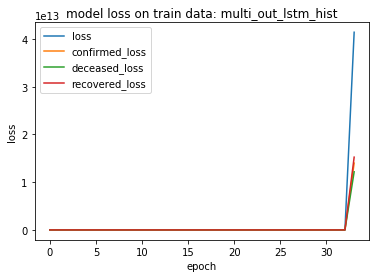

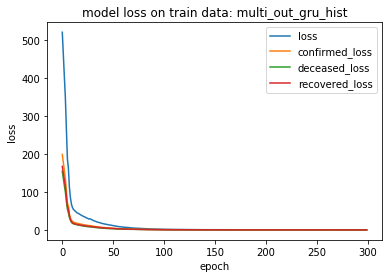

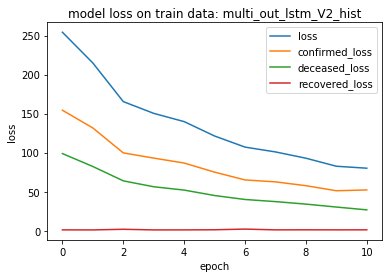

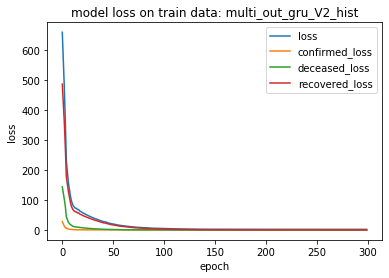

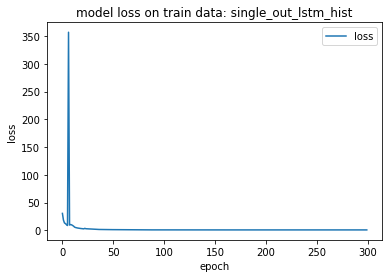

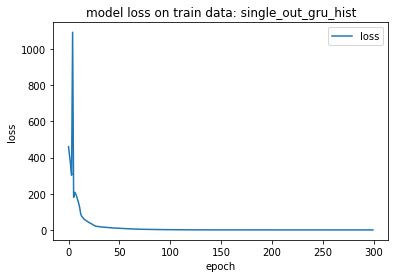

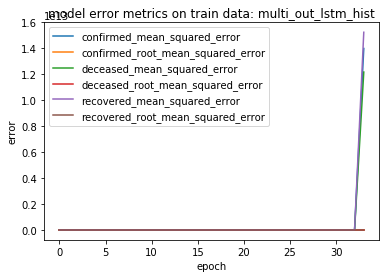

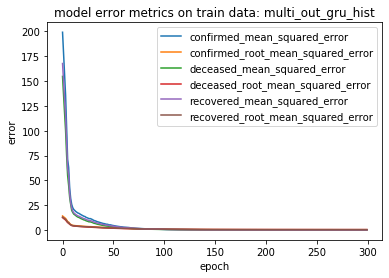

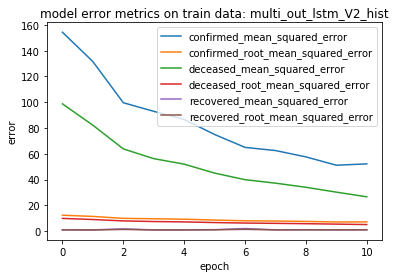

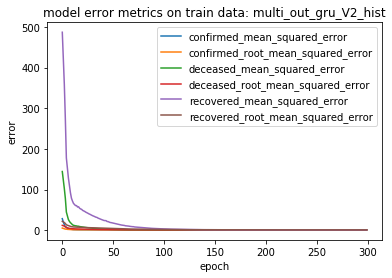

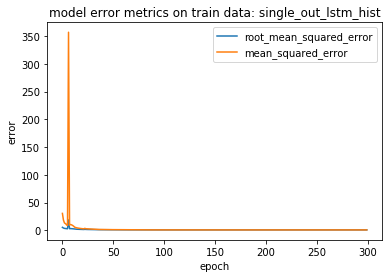

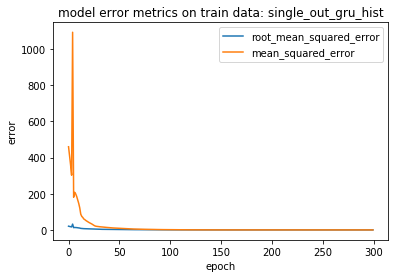

In [72]:
plot_training_history(multi_out_lstm_hist, "multi_out_lstm_hist")
plot_training_history(multi_out_gru_hist, "multi_out_gru_hist")
plot_training_history(multi_out_lstm_V2_hist, "multi_out_lstm_V2_hist")
plot_training_history(multi_out_gru_V2_hist, "multi_out_gru_V2_hist")
plot_training_history_single(single_out_lstm_hist, "single_out_lstm_hist")
plot_training_history_single(single_out_gru_hist, "single_out_gru_hist")

plot_training_metrics(multi_out_lstm_hist, "multi_out_lstm_hist")
plot_training_metrics(multi_out_gru_hist, "multi_out_gru_hist")
plot_training_metrics(multi_out_lstm_V2_hist, "multi_out_lstm_V2_hist")
plot_training_metrics(multi_out_gru_V2_hist, "multi_out_gru_V2_hist")
plot_training_metrics_single(single_out_lstm_hist, "single_out_lstm_hist")
plot_training_metrics_single(single_out_gru_hist, "single_out_gru_hist")

In [77]:
print("multi_out_lstm_eval")
pprint(multi_out_lstm_eval)
print()
print("multi_out_gru_eval")
pprint(multi_out_gru_eval)
print()
print("multi_out_lstm_V2_eval")
pprint(multi_out_lstm_V2_eval)
print()
print("multi_out_gru_V2_eval")
pprint(multi_out_gru_V2_eval)
print()
print("single_out_lstm_eval")
pprint(single_out_lstm_eval)
print()
print("single_out_gru_eval")
pprint(single_out_gru_eval)

multi_out_lstm_eval
{'confirmed_loss': nan,
 'confirmed_mean_squared_error': nan,
 'confirmed_root_mean_squared_error': nan,
 'deceased_loss': nan,
 'deceased_mean_squared_error': nan,
 'deceased_root_mean_squared_error': nan,
 'loss': nan,
 'recovered_loss': nan,
 'recovered_mean_squared_error': nan,
 'recovered_root_mean_squared_error': nan}

multi_out_gru_eval
{'confirmed_loss': 0.08611352741718292,
 'confirmed_mean_squared_error': 0.08611352741718292,
 'confirmed_root_mean_squared_error': 0.2934510409832001,
 'deceased_loss': 0.17620030045509338,
 'deceased_mean_squared_error': 0.17620030045509338,
 'deceased_root_mean_squared_error': 0.4197622239589691,
 'loss': 0.40629199147224426,
 'recovered_loss': 0.14397819340229034,
 'recovered_mean_squared_error': 0.14397819340229034,
 'recovered_root_mean_squared_error': 0.37944459915161133}

multi_out_lstm_V2_eval
{'confirmed_loss': nan,
 'confirmed_mean_squared_error': nan,
 'confirmed_root_mean_squared_error': nan,
 'deceased_loss': nan